In [4]:
#Matrix column entries (attributes):
#name - ASCII subject name and recording number
#MDVP:Fo(Hz) - Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
#measures of variation in fundamental frequency
#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#NHR,HNR - Two measures of ratio of noise to tonal components in the voice
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
#RPDE,D2 - Two nonlinear dynamical complexity measures
#DFA - Signal fractal scaling exponent
#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]


In [6]:
data = pd.read_csv("/content/datasets_410614_786211_parkinsons.csv")
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [25]:
data.shape

(195, 23)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
data.drop('name',axis=1,inplace=True)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [29]:
data.nunique()

MDVP:Fo(Hz)         157
MDVP:Fhi(Hz)        157
MDVP:Flo(Hz)        157
MDVP:Jitter(%)      136
MDVP:Jitter(Abs)     19
MDVP:RAP            120
MDVP:PPQ            129
Jitter:DDP          143
MDVP:Shimmer        188
MDVP:Shimmer(dB)    117
Shimmer:APQ3        149
Shimmer:APQ5        189
MDVP:APQ            152
Shimmer:DDA         189
NHR                 150
HNR                 157
status                2
RPDE                195
DFA                 195
spread1             195
spread2             156
D2                  157
PPE                 157
dtype: int64

In [26]:
data.duplicated().sum()

0

In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,0.422835,0.358877,0.000000,0.069095,0.383884,0.726513,1.000000
MDVP:Fhi(Hz),195.0,0.427897,0.351133,0.000000,0.070807,0.372580,0.728937,1.000000
MDVP:Flo(Hz),195.0,0.343506,0.327691,0.000000,0.077288,0.255657,0.573697,1.000000
MDVP:Jitter(%),195.0,0.391059,0.327034,0.000000,0.112248,0.316837,0.652060,1.000000
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.380486,0.328470,0.000000,0.098361,0.300868,0.622710,1.000000
MDVP:PPQ,195.0,0.369989,0.323290,0.000000,0.095775,0.290610,0.587559,1.000000
Jitter:DDP,195.0,0.380387,0.328418,0.000000,0.098602,0.299904,0.622549,1.000000
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.347441,0.329823,0.000000,0.069626,0.245512,0.558467,1.000000


In [30]:
data.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

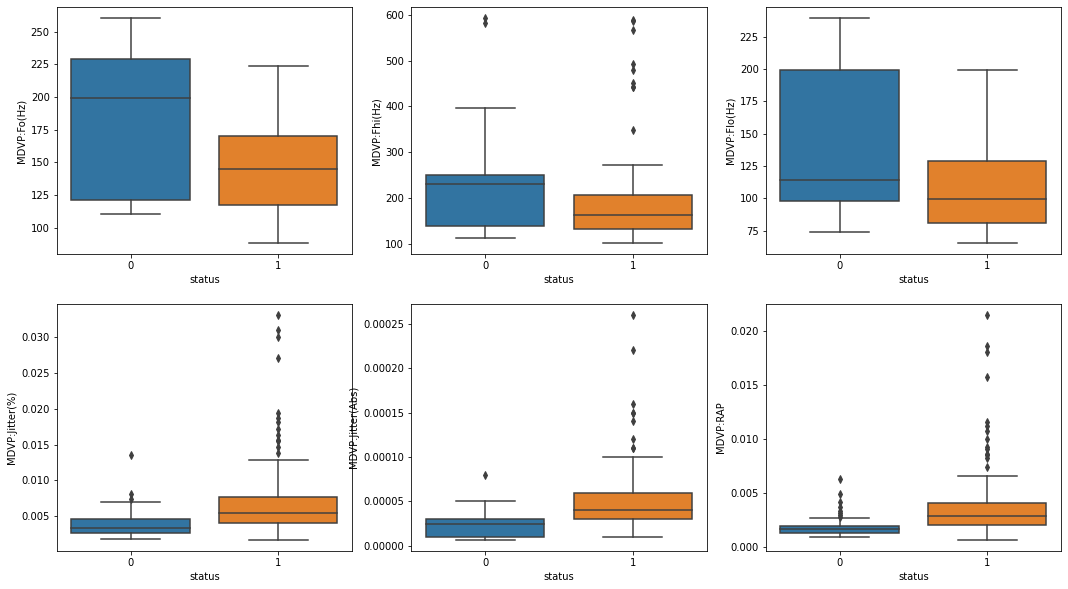

In [11]:
fig, axes = plt.subplots(2,3,figsize= (18,10))
box1=sns.boxplot(x='status',y='MDVP:Fo(Hz)',ax=axes[0,0],data=data)
box2=sns.boxplot(x='status',y='MDVP:Fhi(Hz)',data=data,ax=axes[0,1])
box3=sns.boxplot(y="MDVP:Flo(Hz)", x="status", data=data,ax=axes[0,2])
box4=sns.boxplot(y="MDVP:Jitter(%)", x="status", data=data,ax=axes[1,0])
box5=sns.boxplot(y="MDVP:Jitter(Abs)", x="status", data=data,ax=axes[1,1])
box6=sns.boxplot(y="MDVP:RAP", x="status", data=data,ax=axes[1,2])

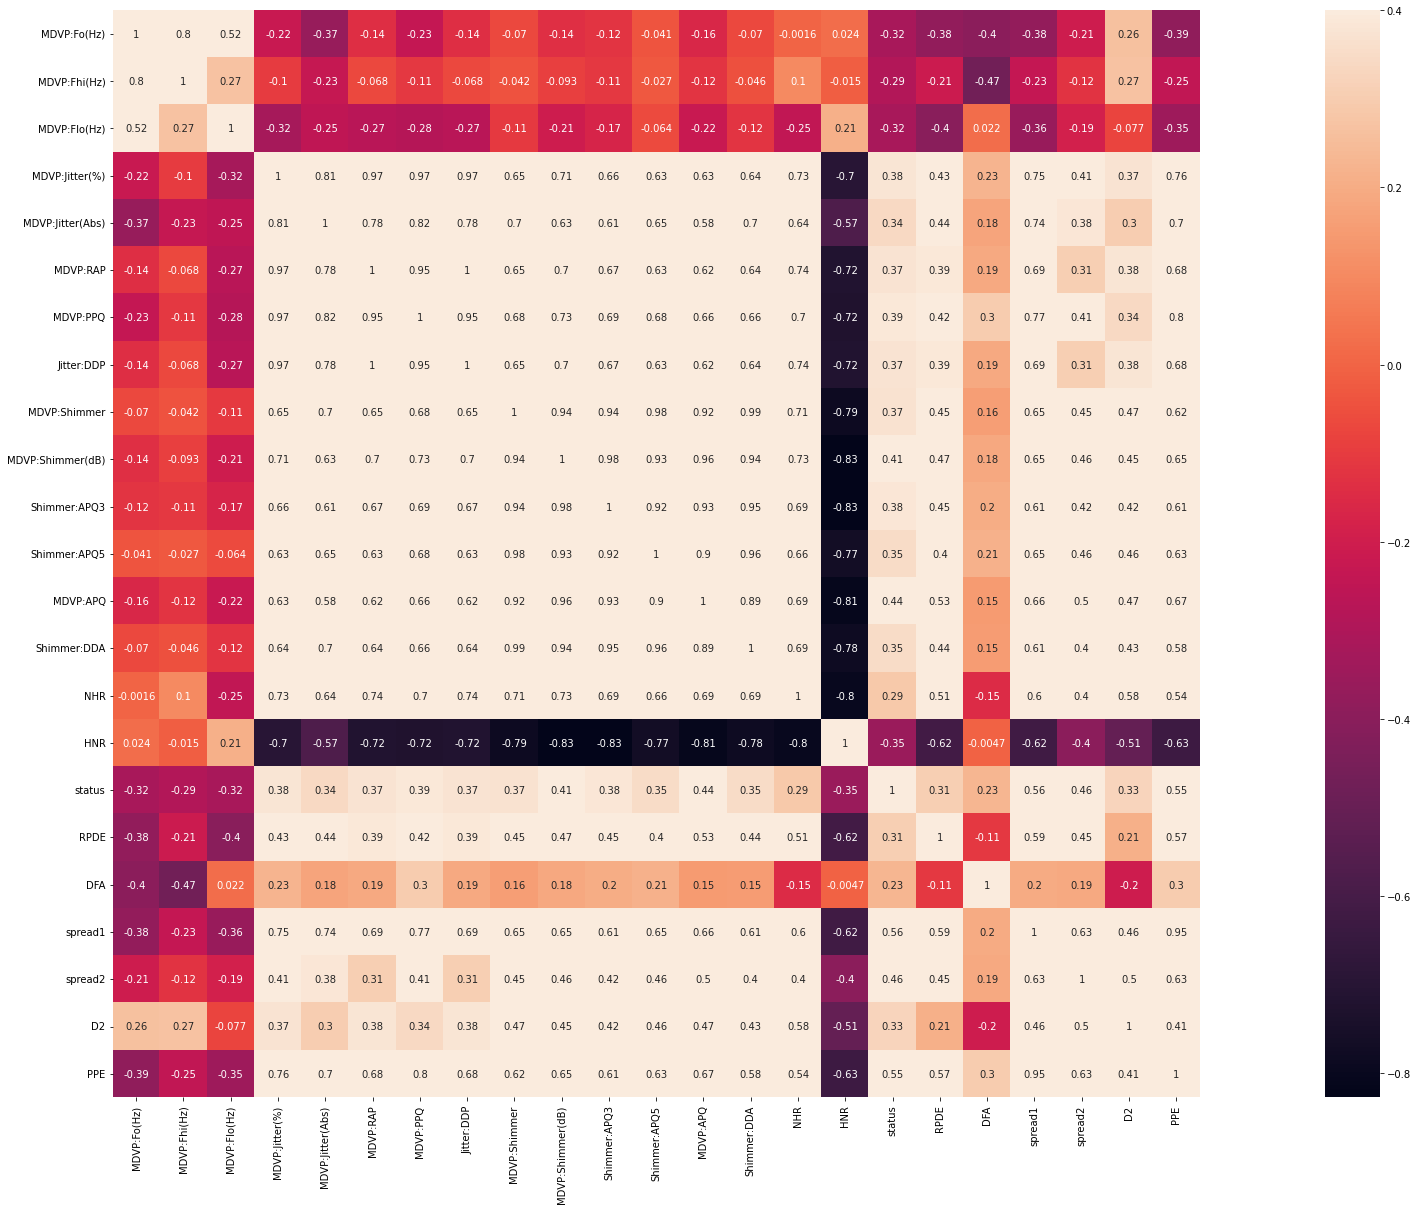

In [31]:
fig = plt.figure(figsize = (45, 20))
sns.heatmap(data.corr(), vmax = 0.40, square = True,annot=True)

#Here it is observed that status' has good correlation with features PPE, D2, spread1, spread2, RPDE, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, MDVP:Jitter(%) & MDVP:Jitter(Abs)

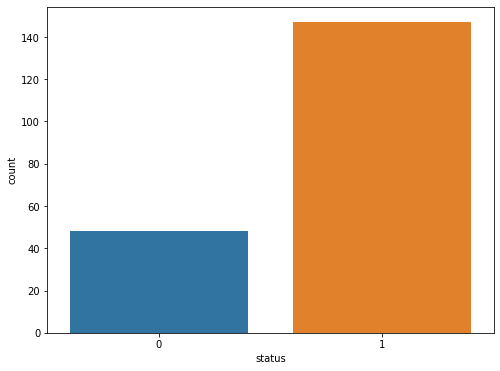

In [36]:

#The main aim of the data is to discriminate healthy people from those with PD, according to "status" 
#column which is set to 0 for healthy and 1 for PD.
fig = plt.figure(figsize = (8, 6))
sns.countplot(x='status',data=data)

#1= parkinsons

#0=healthy

#More number of peoples suffering from parkisons.

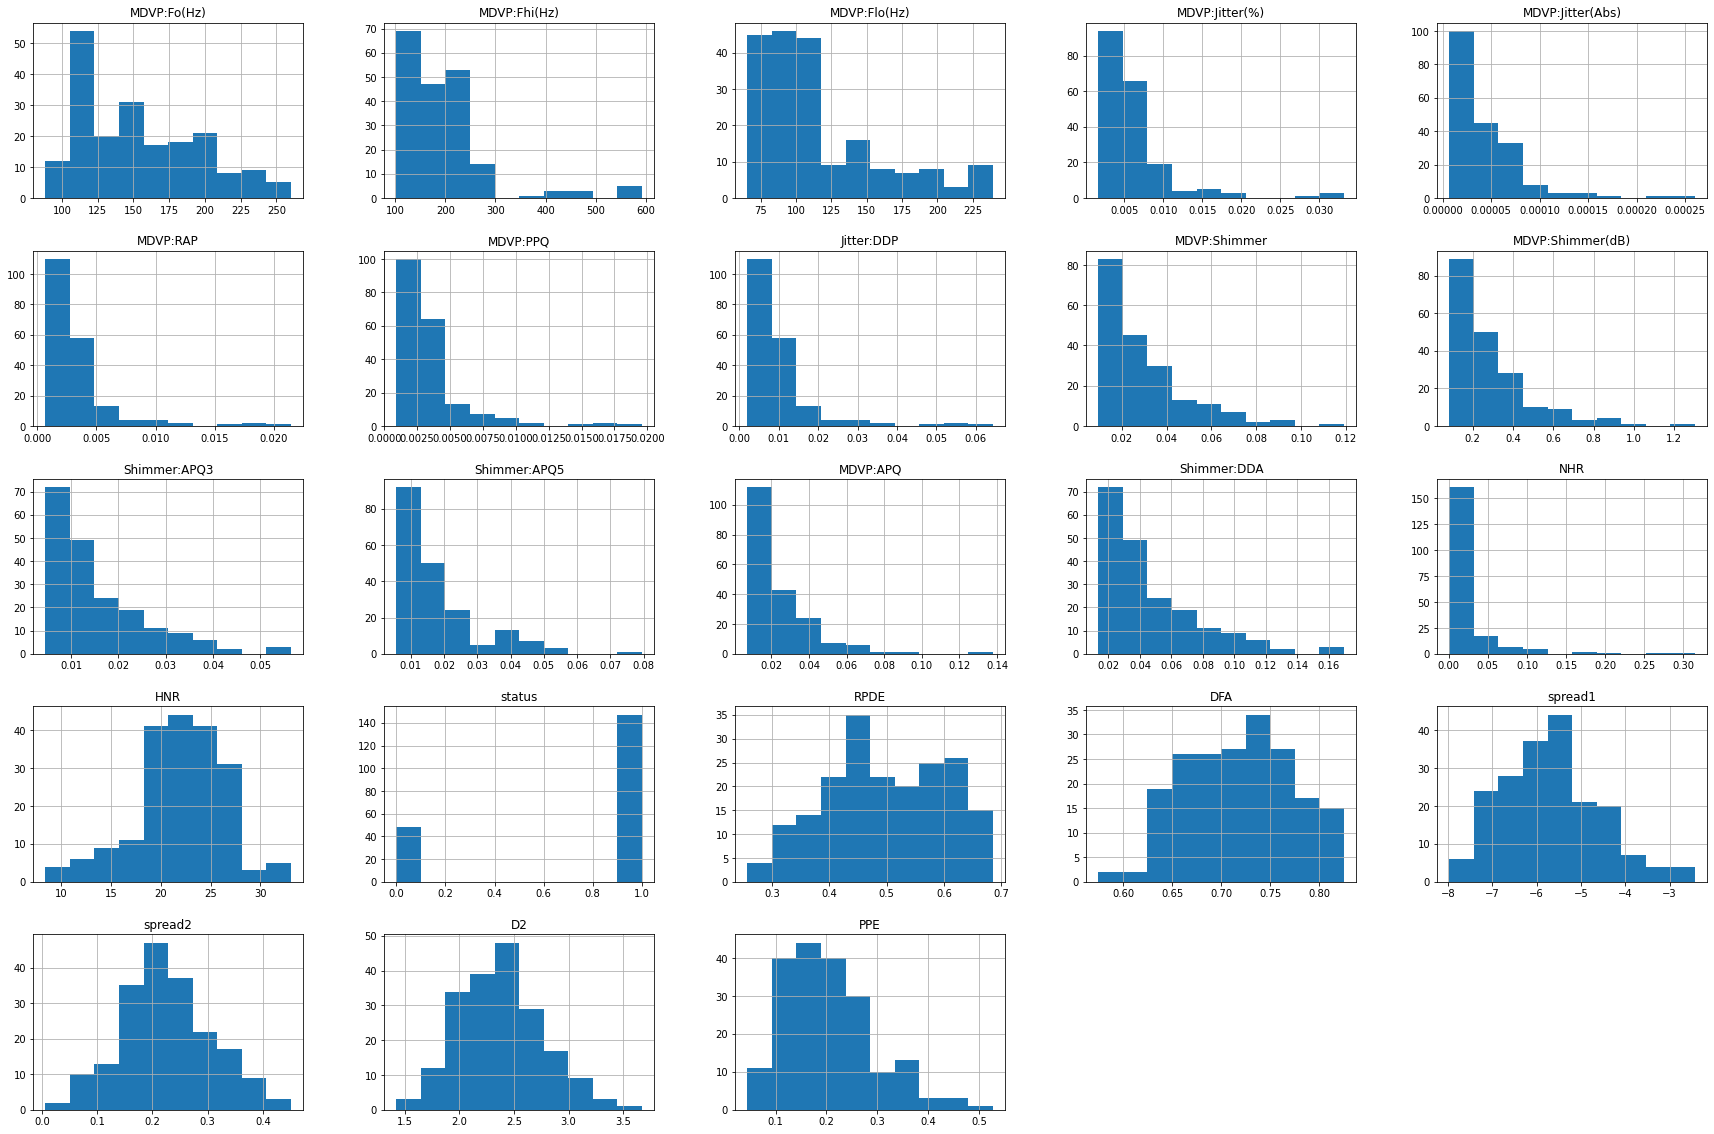

In [14]:

data.hist(figsize=(30,20))
plt.show()

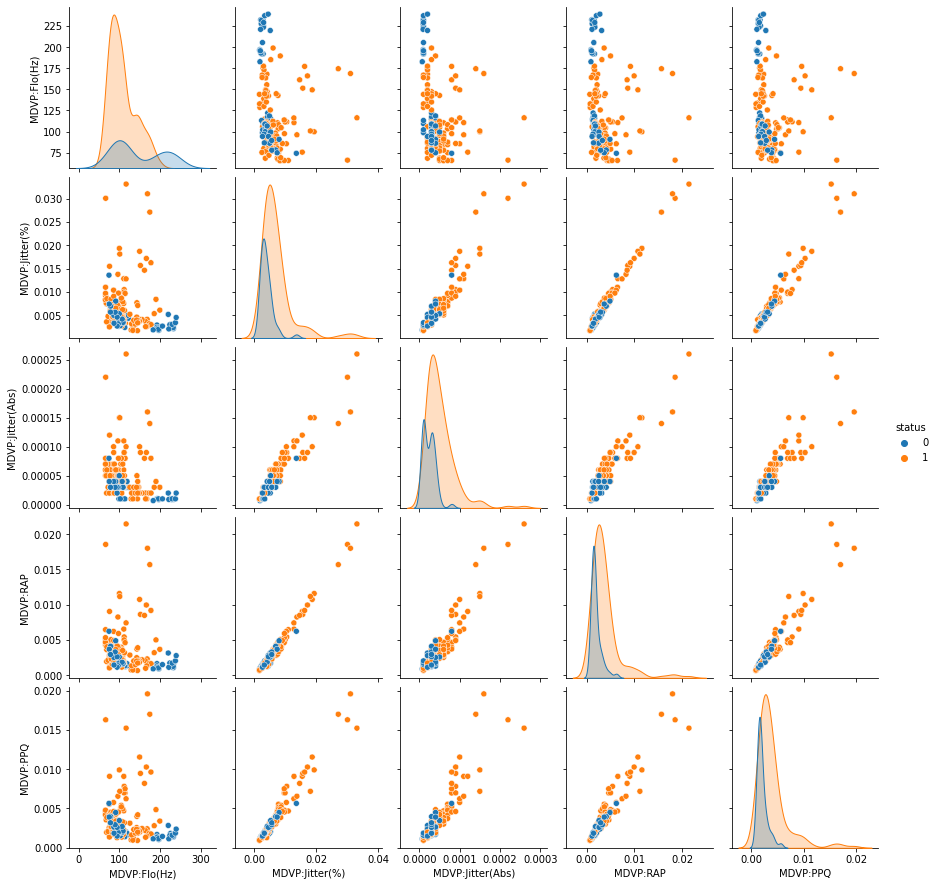

In [15]:
sns.pairplot(data,hue = 'status', vars = ['MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ'] )


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


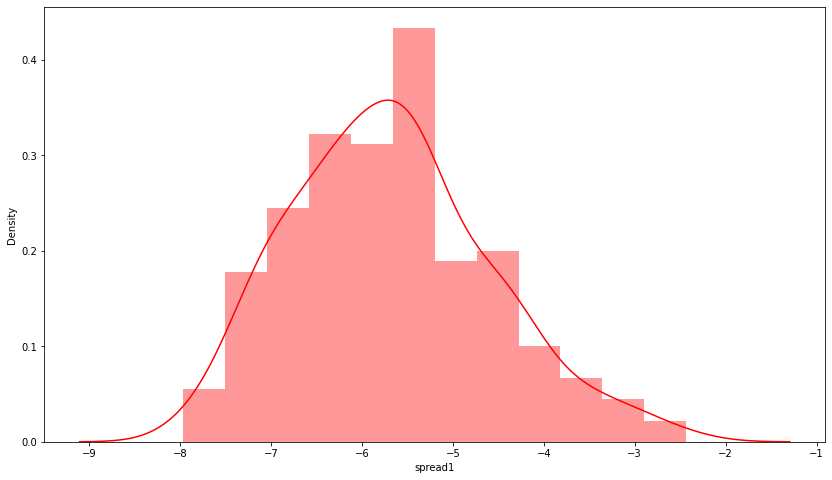

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


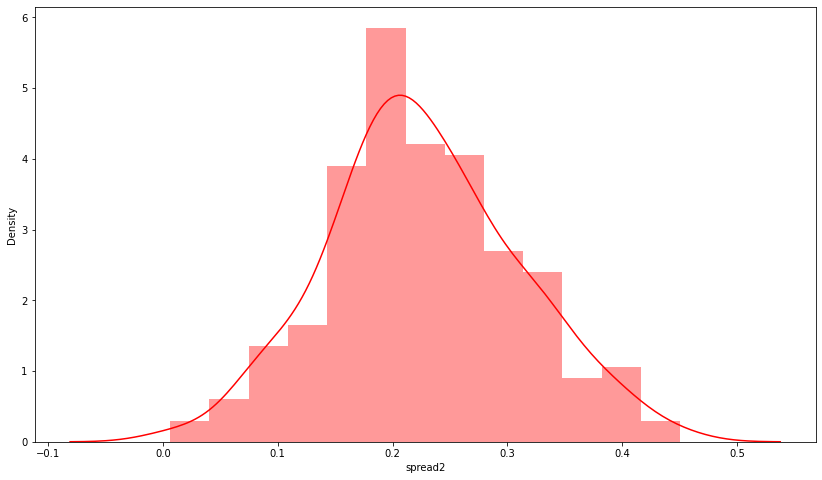

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


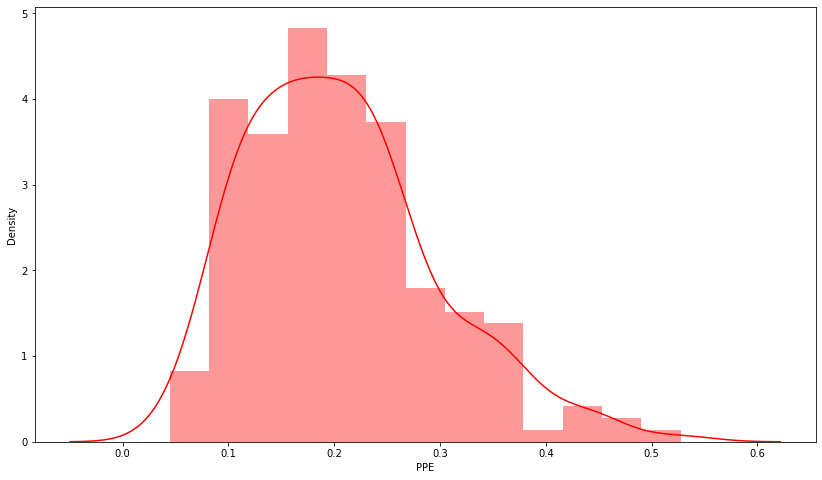

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


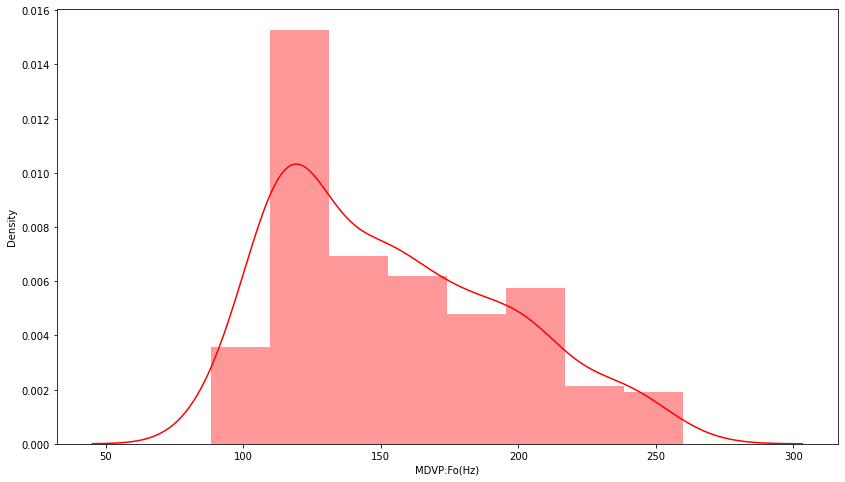

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


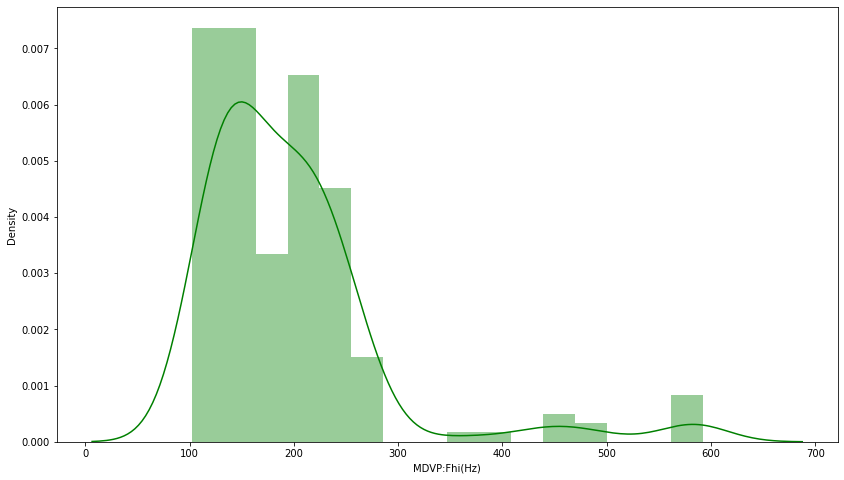

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


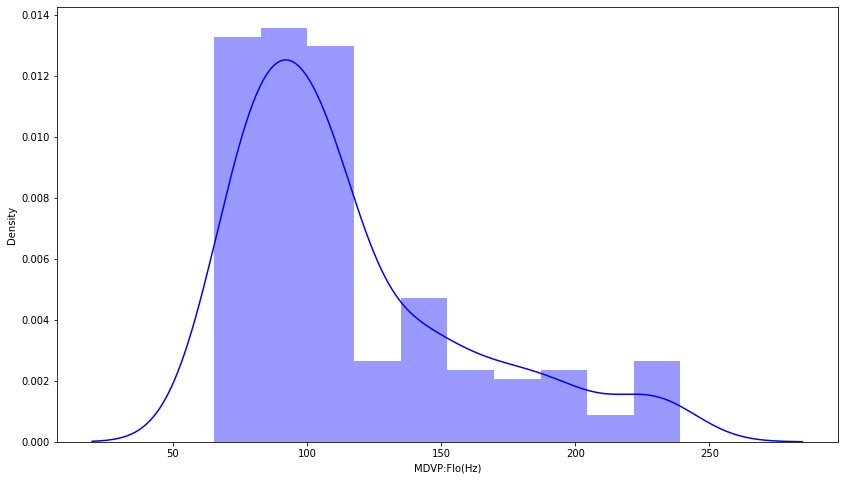

In [16]:

sns.distplot(data['spread1'],kde=True,hist=True,color="r")
plt.show()
sns.distplot(data['spread2'],kde=True,hist=True,color="r")
plt.show()
sns.distplot(data['PPE'],kde=True,hist=True,color="r")
plt.show()
sns.distplot(data['MDVP:Fo(Hz)'],kde=True,hist=True,color="r")
plt.show()
sns.distplot(data['MDVP:Fhi(Hz)'],kde=True,hist=True,color="g")
plt.show()
sns.distplot(data['MDVP:Flo(Hz)'],kde=True,hist=True,color="b")
plt.show()


In [47]:
features_list =data.columns
features_list.drop("status")

print(features_list)

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


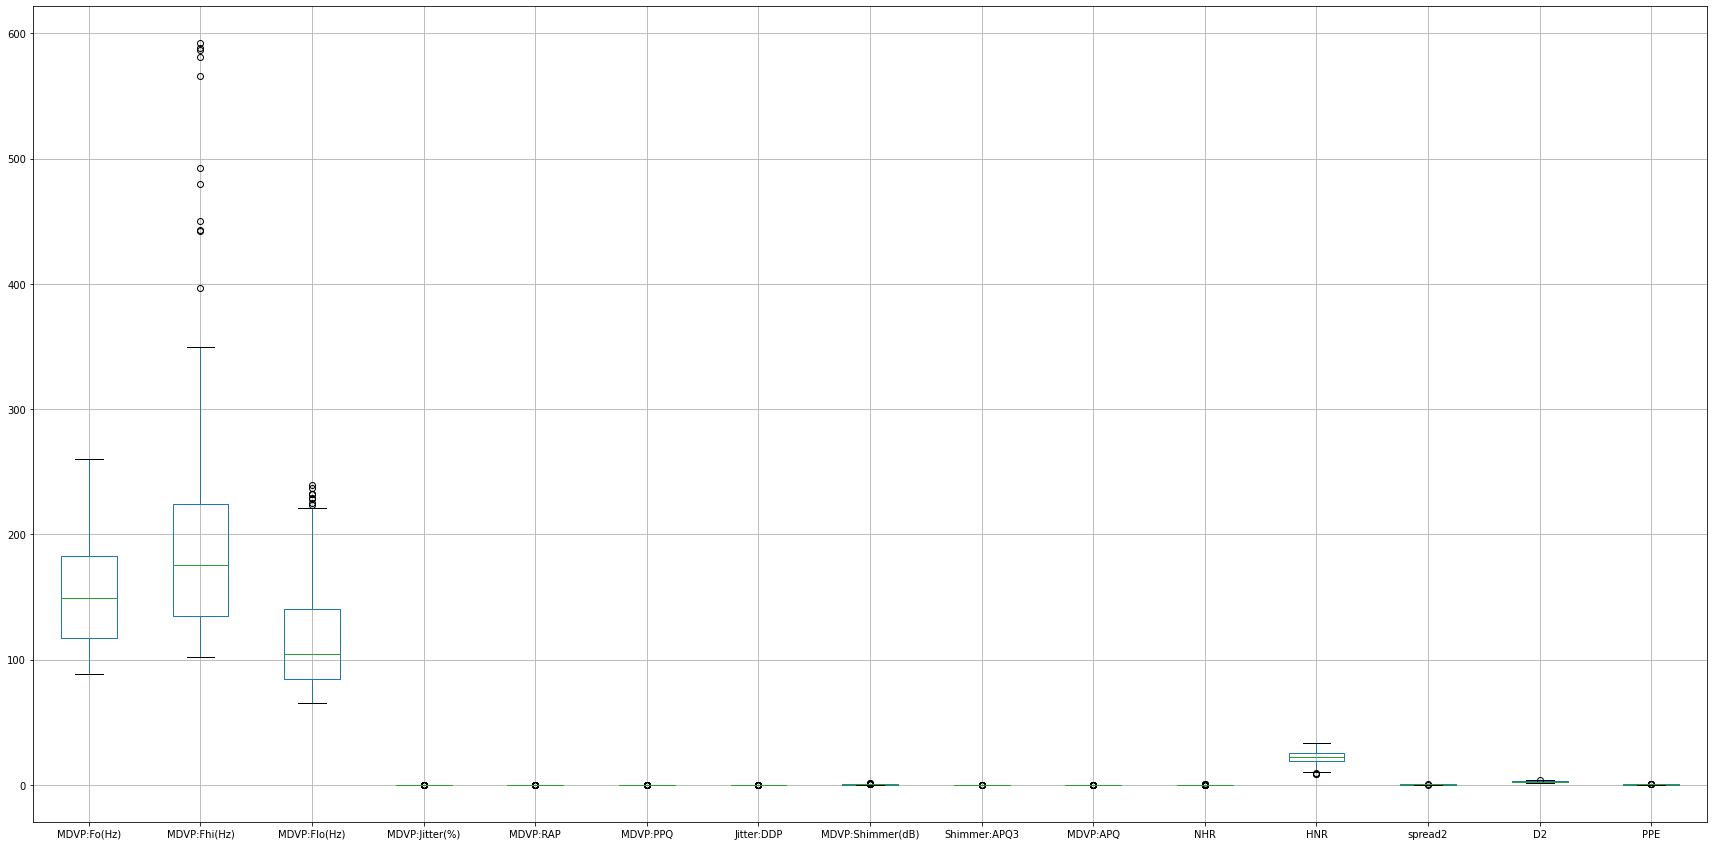

In [18]:
plt.figure(figsize=(30,15))
data.boxplot(column=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer(dB)','Shimmer:APQ3','MDVP:APQ','NHR','HNR','spread2','D2','PPE'])   

In [20]:
def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1
    
    
for i in ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer(dB)','Shimmer:APQ3','MDVP:APQ','NHR','HNR','spread2','D2','PPE']:
    data[i]=handle_outliers(data[i])

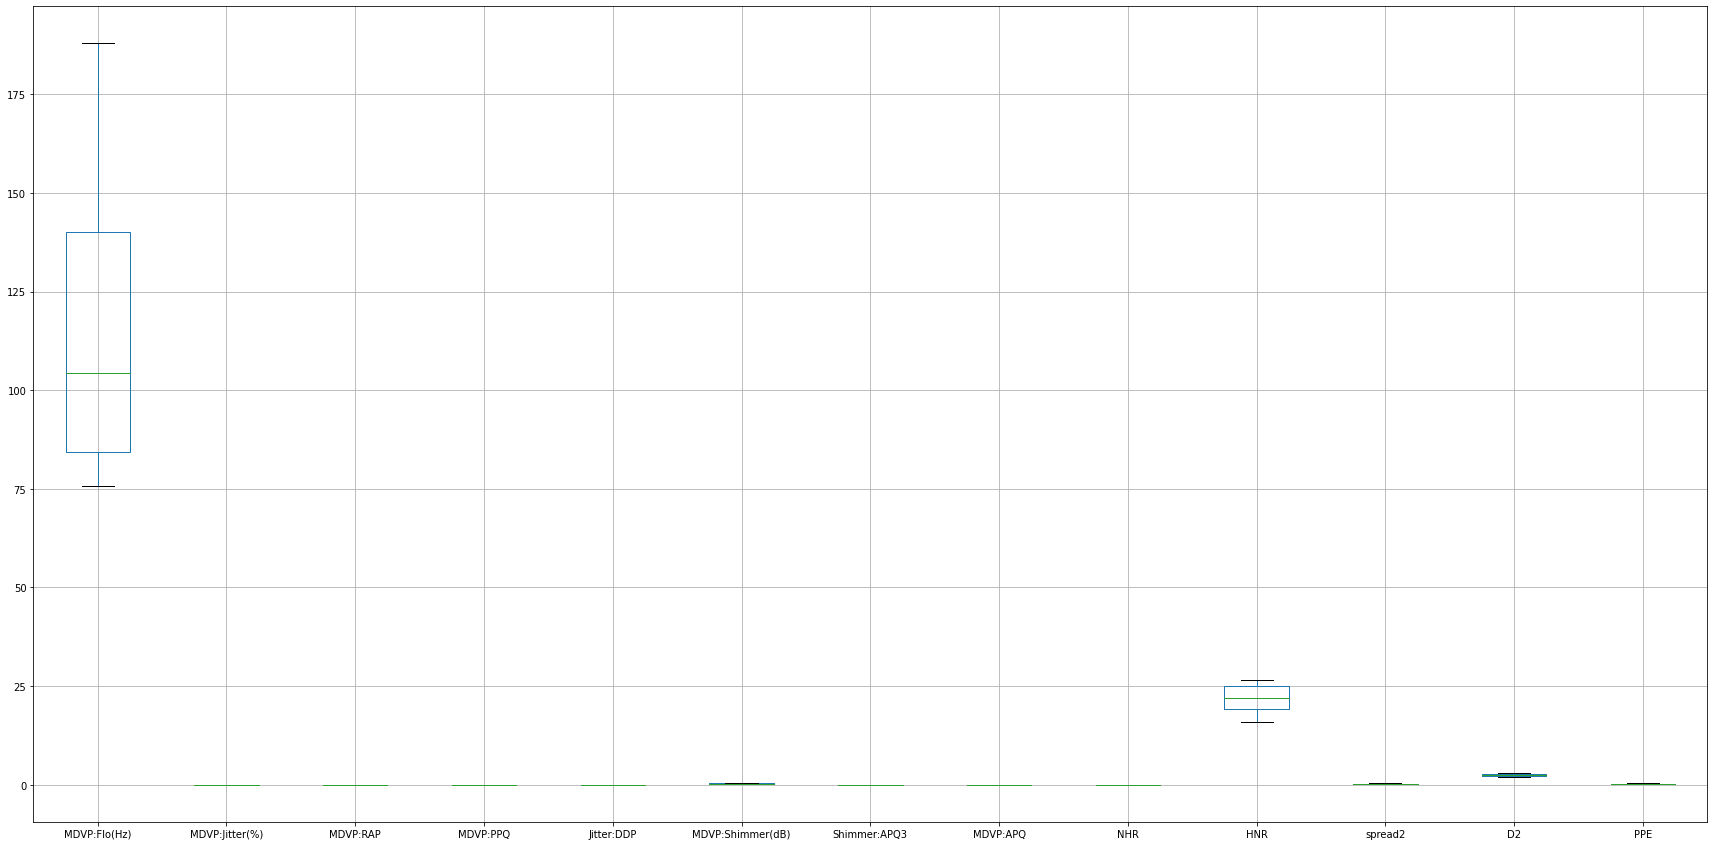

In [21]:
plt.figure(figsize=(30,15))
data.boxplot(column=['MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer(dB)','Shimmer:APQ3','MDVP:APQ','NHR','HNR','spread2','D2','PPE']);

In [22]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer(dB)','Shimmer:APQ3','MDVP:APQ','NHR','HNR','spread2','D2','PPE']]=scale.fit_transform(data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer(dB)','Shimmer:APQ3','MDVP:APQ','NHR','HNR','spread2','D2','PPE']])

In [37]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scale.fit_transform(data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer(dB)','Shimmer:APQ3','MDVP:APQ','NHR','HNR','spread2','D2','PPE']])

array([[0.0934969 , 0.23610415, 0.        , ..., 0.66862933, 0.37733405,
        0.78704378],
       [0.11777815, 0.17237066, 0.34031705, ..., 0.98702249, 0.56330854,
        1.        ],
       [0.06012028, 0.04317259, 0.32014979, ..., 0.87452892, 0.41827465,
        0.99377731],
       ...,
       [0.64502799, 0.84532179, 0.        , ..., 0.17092002, 0.75680976,
        0.12812481],
       [0.88780009, 1.        , 0.        , ..., 0.39667656, 0.21400693,
        0.09183657],
       [1.        , 0.99465204, 0.02100815, ..., 0.31933579, 0.63213835,
        0.20068836]])

In [38]:
## Get the Parkinson Patients and the normal people dataset 

parkinson = data[data['status']==1]

normal = data[data['status']==0]

In [39]:
print(parkinson.shape,normal.shape)

(147, 23) (48, 23)


In [40]:
from imblearn.over_sampling import RandomOverSampler


In [48]:
# Store the variable we are predicting 
target = "status"
# Define a random state 
state = np.random.RandomState(42)
X = data[features_list]
Y = data[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(195, 23)
(195,)


In [49]:
ros = RandomOverSampler()
X_res,y_res= ros.fit_resample(X,Y)

In [50]:
X_res.shape,y_res.shape

((294, 23), (294,))

In [55]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn import svm # SVM
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.naive_bayes import GaussianNB #Naive Byes
from xgboost import XGBClassifier #Extreme Gradient Boost
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [56]:
#split dataset in features and target variable
feature_cols = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer(dB)','Shimmer:APQ3','MDVP:APQ','NHR','HNR','spread2','D2','PPE']
X = data[feature_cols] # Features
y = data.status # Target variable

In [57]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2) # 70% training and 30% test

**DecisionTreeClassifier**

In [58]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
dt_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",dt_accuracy,'%')

dt_precision = round(precision_score(y_test, y_pred)*100,2)
dt_recall = round(recall_score(y_test, y_pred)*100,2)
dt_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',dt_precision,'%')
print('\nRecall: ',dt_recall,'%')
print('\nF1 Score:',dt_fScore,'%')


Confusion matrix:
 [[ 6  6]
 [ 7 40]]

Accuracy: 77.97 %

Precision:  86.96 %

Recall:  85.11 %

F1 Score: 86.02 %


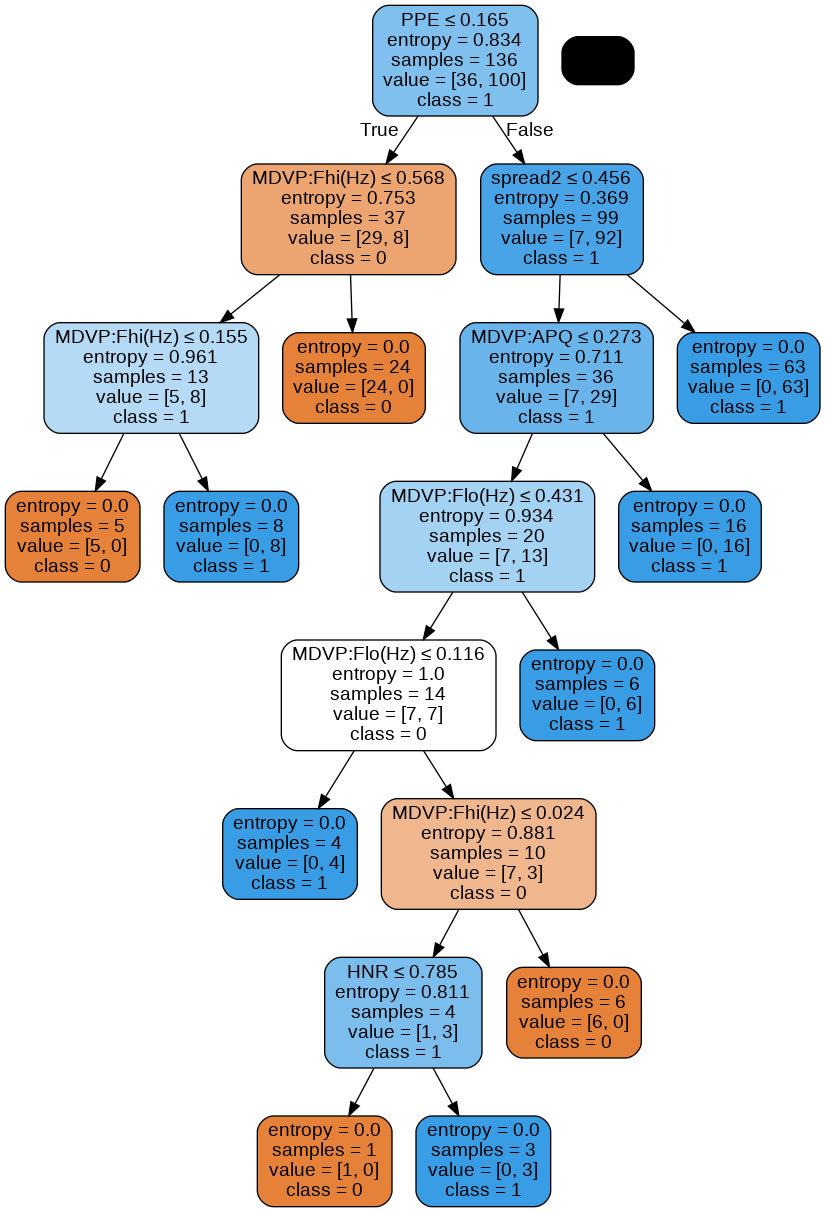

In [59]:
# Generating the decision tree

from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('parkisons.png')
Image(graph.create_png())

**SVM** **model**

In [60]:
#SVM classifier

clf = svm.SVC() # Create SVM classifier

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
svm_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",svm_accuracy,'%')

svm_precision = round(precision_score(y_test, y_pred)*100,2)
svm_recall = round(recall_score(y_test, y_pred)*100,2)
svm_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',svm_precision,'%')
print('\nRecall: ',svm_recall,'%')
print('\nF1 Score:',svm_fScore,'%')


Confusion matrix:
 [[ 5  7]
 [ 2 45]]

Accuracy: 84.75 %

Precision:  86.54 %

Recall:  95.74 %

F1 Score: 90.91 %


**KNN classifier**

In [61]:
# KNN

clf = KNeighborsClassifier(n_neighbors=5)

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
knn_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",knn_accuracy,'%')

knn_precision = round(precision_score(y_test, y_pred)*100,2)
knn_recall = round(recall_score(y_test, y_pred)*100,2)
knn_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',knn_precision,'%')
print('\nRecall: ',knn_recall,'%')
print('\nF1 Score:',knn_fScore,'%')

Confusion matrix:
 [[11  1]
 [ 5 42]]

Accuracy: 89.83 %

Precision:  97.67 %

Recall:  89.36 %

F1 Score: 93.33 %


# Logistic Regression

In [62]:
# Logistic Regression

clf = LogisticRegression(solver='lbfgs') 

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
lr_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",lr_accuracy,'%')

lr_precision = round(precision_score(y_test, y_pred)*100,2)
lr_recall = round(recall_score(y_test, y_pred)*100,2)
lr_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',lr_precision,'%')
print('\nRecall: ',lr_recall,'%')
print('\nF1 Score:',lr_fScore,'%')


Confusion matrix:
 [[ 6  6]
 [ 4 43]]

Accuracy: 83.05 %

Precision:  87.76 %

Recall:  91.49 %

F1 Score: 89.58 %


# Naive Bayes

In [63]:
# Naive Bayes

clf = GaussianNB() # Naive Bayes

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
nb_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",nb_accuracy,'%')

nb_precision = round(precision_score(y_test, y_pred)*100,2)
nb_recall = round(recall_score(y_test, y_pred)*100,2)
nb_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',nb_precision,'%')
print('\nRecall: ',nb_recall,'%')
print('\nF1 Score:',nb_fScore,'%')

Confusion matrix:
 [[12  0]
 [18 29]]

Accuracy: 69.49 %

Precision:  100.0 %

Recall:  61.7 %

F1 Score: 76.32 %


# Random Forest

In [64]:
# Random Forest

clf=RandomForestClassifier(n_estimators=100,criterion =  "entropy")

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
rf_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",rf_accuracy,'%')

rf_precision = round(precision_score(y_test, y_pred)*100,2)
rf_recall = round(recall_score(y_test, y_pred)*100,2)
rf_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',rf_precision,'%')
print('\nRecall: ',rf_recall,'%')
print('\nF1 Score:',rf_fScore,'%')

Confusion matrix:
 [[ 8  4]
 [ 2 45]]

Accuracy: 89.83 %

Precision:  91.84 %

Recall:  95.74 %

F1 Score: 93.75 %


# XGBoost

In [65]:

# XGBoost

clf=XGBClassifier(n_estimators=30)

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('\nConfusion matrix:\n',c_matrix)

# Accuracy
xgb_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",xgb_accuracy,'%')

xgb_precision = round(precision_score(y_test, y_pred)*100,2)
xgb_recall = round(recall_score(y_test, y_pred)*100,2)
xgb_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',xgb_precision,'%')
print('\nRecall: ',xgb_recall,'%')
print('\nF1 Score:',xgb_fScore,'%')


Confusion matrix:
 [[10  2]
 [ 6 41]]

Accuracy: 86.44 %

Precision:  95.35 %

Recall:  87.23 %

F1 Score: 91.11 %


#Model Evaluation

In [66]:
model_ev = pd.DataFrame({'Model':['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'],
                    'Accuracy %':[lr_accuracy,nb_accuracy,rf_accuracy,xgb_accuracy,knn_accuracy,dt_accuracy,svm_accuracy],
                    'Precision %':[lr_precision,nb_precision,rf_precision,xgb_precision,knn_precision,dt_precision,svm_precision],
                    'Recall %':[lr_recall,nb_recall,rf_recall,xgb_recall,knn_recall,dt_recall,svm_recall],
                    'F1 Score %':[lr_fScore,nb_fScore,rf_fScore,xgb_fScore,knn_fScore,dt_fScore,svm_fScore]})

model_ev.sort_values(by='Accuracy %',ignore_index=True,inplace=True)
model_ev


,Model,Accuracy %,Precision %,Recall %,F1 Score %
0,Naive Bayes,69.49,100.00,61.70,76.32
1,Decision Tree,77.97,86.96,85.11,86.02
2,Logistic Regression,83.05,87.76,91.49,89.58
3,Support Vector Machine,84.75,86.54,95.74,90.91
4,Extreme Gradient Boost,86.44,95.35,87.23,91.11
5,Random Forest,89.83,91.84,95.74,93.75
6,K-Nearest Neighbour,89.83,97.67,89.36,93.33


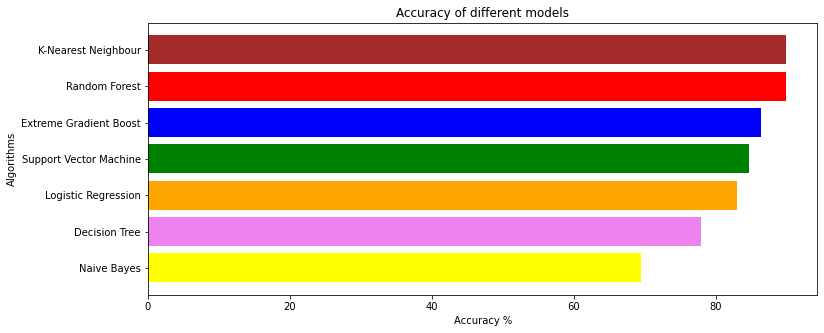

In [67]:
# Barplot for Accuracy of different models

plt.figure(figsize=(12,5))
plt.title("Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.barh(model_ev['Model'],model_ev['Accuracy %'],color=['yellow','violet','orange','green','blue','red','brown'])
plt.show()


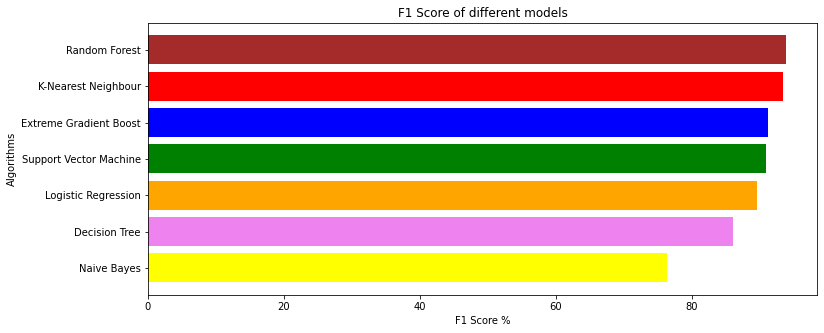

In [68]:
# Barplot for F1 Score of different models

model_fs=model_ev.sort_values(by='F1 Score %',ignore_index=True)
plt.figure(figsize=(12,5))
plt.title("F1 Score of different models")
plt.xlabel("F1 Score %")
plt.ylabel("Algorithms")
plt.barh(model_fs['Model'],model_fs['F1 Score %'],color=['yellow','violet','orange','green','blue','red','brown'])
plt.show()
